In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, preprocessing, pipeline
import itertools
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Price = Milage * -0.17 + 24764.56


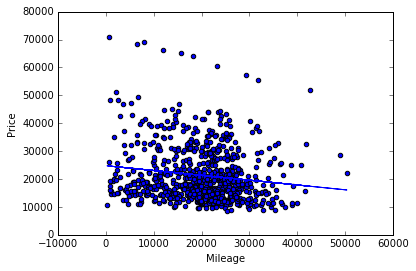

R² = 0.02


In [3]:
mileage_to_price = linear_model.LinearRegression()
mileage_to_price.fit(df[["Mileage"]],df.Price)
print("Price = Milage * {:0.2f} + {:0.2f}".format(mileage_to_price.coef_[0], mileage_to_price.intercept_))
plt.scatter(df.Mileage,df.Price)
plt.plot(df.Mileage,mileage_to_price.predict(df[["Mileage"]]))
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()
print('R\u00b2 = {:0.2f}'.format(mileage_to_price.score(df[["Mileage"]],df[["Price"]])))

Milage alone is apparently a poor predictor of price. Perhaps original MSRP would be a powerful additional feature.

In [4]:
numeric_to_price = linear_model.LinearRegression()
numeric_cols = ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
numeric_to_price.fit(df[numeric_cols],df.Price)
formula = "Price = "
for name, value in zip(numeric_cols,numeric_to_price.coef_):
    formula = formula + "{} * {:0.4f} + ".format(name, value)
print(formula + "{:0.4f}".format(numeric_to_price.intercept_))

Price = Mileage * -0.1697 + Cylinder * 3792.3789 + Liter * -787.2207 + Doors * -1542.7458 + Cruise * 6288.9971 + Sound * -1993.7953 + Leather * 3349.3616 + 6758.7551


In [5]:
r_dict = {}
for i in range(len(numeric_cols)):
    for cols in itertools.combinations(numeric_cols,i+1):
        combo_model = linear_model.LinearRegression()
        combo_model.fit(df[list(cols)],df.Price)
        r_dict[cols] = combo_model.score(df[list(cols)],df.Price)
        if i == 0:
            print( "".join([cols[0]," : ", str(combo_model.score(df[list(cols)],df.Price))]))

best_r_dict = {}
for each_key in r_dict:
    if len(each_key) in best_r_dict:
        if r_dict[each_key] > best_r_dict[len(each_key)][1] :
            best_r_dict[len(each_key)] = (each_key, r_dict[each_key])
        elif r_dict[each_key] == best_r_dict[len(each_key)][1]:
            print("DUPLICATE RSQ:")
            print(each_key)
    else:
        best_r_dict[len(each_key)] = (each_key, r_dict[each_key])
for i in range(len(numeric_cols)):
    print(best_r_dict[i+1])

Mileage : 0.0204634473235
Cylinder : 0.323859037595
Liter : 0.311526744279
Doors : 0.0192514665915
Cruise : 0.185633009297
Sound : 0.0154623876242
Leather : 0.0247108512641
(('Cylinder',), 0.32385903759512258)
(('Cylinder', 'Cruise'), 0.38394913240273443)
(('Cylinder', 'Cruise', 'Leather'), 0.40380272693971553)
(('Mileage', 'Cylinder', 'Cruise', 'Leather'), 0.42250742147747633)
(('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather'), 0.4369402151237245)
(('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'), 0.4456909210587025)
(('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'), 0.4462643536728379)


Even with all 7 numeric columns the correlation to price is quite low.
The features in descending order of significance are as follows:

1. Cylinder
2. Cruise
3. Leather
4. Milage
5. Doors
6. Sound
7. Liter

After Cruise the additional value becomes questionable.

In [6]:
categorical_cols = ['Make', 'Model', 'Trim', 'Type']
numeric_cols = ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
df_dummy = pd.get_dummies(df, prefix = categorical_cols, columns=categorical_cols)
all_columns_model = linear_model.LinearRegression()
all_input_cols = list(df_dummy.columns)
all_input_cols.remove("Price")
all_columns_model.fit(df_dummy[all_input_cols],df_dummy["Price"])
print(all_columns_model.score(df_dummy[all_input_cols],df_dummy["Price"]))
for name, coef in zip(all_input_cols,all_columns_model.coef_):
    print(name, coef)

0.992408261421
Mileage -0.185359010907
Cylinder 466.582266629
Liter 4340.19525394
Doors -1333.77878307
Cruise 69.4021230791
Sound 211.264191337
Leather 295.357793184
Make_Buick -3531.31280255
Make_Cadillac 9721.14345502
Make_Chevrolet -4106.40140815
Make_Pontiac -4706.64123119
Make_SAAB 5516.71260003
Make_Saturn -2893.50061316
Model_9-2X AWD -3671.61655986
Model_9_3 1440.62697287
Model_9_3 HO 2307.38421403
Model_9_5 2442.88721238
Model_9_5 HO 2997.43076061
Model_AVEO 65.5179240467
Model_Bonneville -2882.26976031
Model_CST-V 1336.91565944
Model_CTS -300.334424541
Model_Cavalier -539.75939637
Model_Century -2231.24375512
Model_Classic 988.984438125
Model_Cobalt 414.295890181
Model_Corvette 5164.12944633
Model_Deville -5900.22621282
Model_G6 733.986885347
Model_GTO -25.4485986553
Model_Grand Am -906.027416052
Model_Grand Prix -3095.28797918
Model_Impala -2900.68209633
Model_Ion -683.394385098
Model_L Series -2210.10622806
Model_Lacrosse -1020.77493294
Model_Lesabre -2226.35871522
Model_Ma

In [7]:
r_dict = {}
all_cols = categorical_cols + numeric_cols
print(all_cols)
for i in range(len(all_cols)):
    for cols in itertools.combinations(all_cols,i+1):
        cols = list(cols)
        sub_df = df[cols + ["Price"]]
        categoricals = list([x for x in cols if x in categorical_cols])
        if len(categoricals) > 0:
            sub_df = pd.get_dummies(sub_df, prefix = categoricals, columns=categoricals)
        all_columns_model = linear_model.LinearRegression()
        all_input_cols = list(sub_df.columns)
        all_input_cols.remove("Price")
        all_columns_model.fit(sub_df[all_input_cols],sub_df["Price"])
        r_dict[tuple(cols)] = all_columns_model.score(sub_df[all_input_cols],sub_df["Price"])
        if i == 0:
            print( "".join([cols[0]," : ", str(all_columns_model.score(sub_df[all_input_cols],sub_df["Price"]))]))

best_r_dict = {}
for each_key in r_dict:
    if len(each_key) in best_r_dict:
        if r_dict[each_key] > best_r_dict[len(each_key)][1] :
            best_r_dict[len(each_key)] = (each_key, r_dict[each_key])
        elif r_dict[each_key] == best_r_dict[len(each_key)][1]:
            print("DUPLICATE RSQ:")
            print(each_key,r_dict[each_key])
    else:
        best_r_dict[len(each_key)] = (each_key, r_dict[each_key])
for i in range(len(all_cols)):
    print(best_r_dict[i+1])

['Make', 'Model', 'Trim', 'Type', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
Make : 0.644426591411
Model : 0.948959272833
Trim : 0.633204625261
Type : 0.307002407331
Mileage : 0.0204634473235
Cylinder : 0.323859037595
Liter : 0.311526744279
Doors : 0.0192514665915
Cruise : 0.185633009297
Sound : 0.0154623876242
Leather : 0.0247108512641
DUPLICATE RSQ:
('Make', 'Model', 'Trim', 'Type', 'Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather') 0.992408261421
DUPLICATE RSQ:
('Model', 'Trim', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather') 0.992408261421
DUPLICATE RSQ:
('Model', 'Trim', 'Mileage', 'Doors', 'Cruise', 'Leather') 0.9923353072
DUPLICATE RSQ:
('Model', 'Trim', 'Mileage', 'Liter', 'Cruise', 'Leather') 0.9923353072
DUPLICATE RSQ:
('Make', 'Model', 'Trim', 'Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather') 0.992408261421
DUPLICATE RSQ:
('Make', 'Model', 'Trim', 'Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather') 0.992

Model, trim level and mileage are the most important contributors to price. This probably has to do with the fact that almost if not all the other categories are dependant on model and trim level. That's to say that by the time one has specified a model and trim level, sound, leather, engine etc are very limited.

In [8]:
# cat_df = df[categorical_cols]
# le = preprocessing.LabelEncoder()
# ohe = preprocessing.OneHotEncoder()
# linear = linear_model.LinearRegression()
# le.fit_transform(cat_df["Trim"])

In [9]:
# le = preprocessing.LabelEncoder()
# ohe = preprocessing.OneHotEncoder()
# linear = linear_model.LinearRegression()
# full_model = pipeline.Pipeline([('Label',le),("OneHot",ohe),("Linear",linear)])
# full_model.fit(df[all_cols],df.Price)
# full_model.get_params("Label")